# Generate model

**Aim**: Use k_means to cluster the Piedmont wines dataset.  
**Dataset Description**: There are 178 samples from 3 distinct varieties of Piedmont wine(Barolo, Grignolino and Barbera). Features measures chemical composition e.g. alcohol content and also visual properties like "color intensity". See [more](https://archive.ics.uci.edu/ml/datasets/wine).  
**important concept**:
* k-means: an clustering algorithm that attempts to minimise the inertia when choosing clustering.  
* Inertia: distance from each sample to centroid of its cluster.

In [48]:
# Import the required packages
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets

In [56]:
wine = datasets.load_wine()
data = wine.data
variety = wine.target

**Problem**: How to choose the number of clusters for k_means?  
**Analysis**: The aim of the algorithm is to minimise the inertia. We can easily guess that the inertia always decreases when the number of clusters increase. To prove it, we can plot the line chart between inertia and the number of clusters.

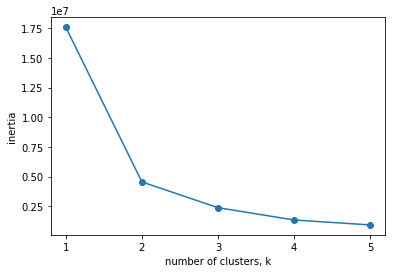

In [57]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

That is exactly what I want!!!  

**Problem now**: Consider trade-off between low inertia and the number of clusters.  **Think about it!!!**  
**Answer**: Choose an "elbow" where inertia begins to decrease more slowly in the inertia plot

In [37]:
model = KMeans(n_clusters = 3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Measurement

If we have information about target variable, use crosstable.

In [59]:
labels = model.predict(data)
df = pd.DataFrame({'labels': labels, 'variety': variety})
ct = pd.crosstab(df['labels'], df['variety'])
print(ct)

variety   0   1   2
labels             
0         1  20  27
1        20   0   0
2        26   1   0
3         0  45  12
4        12   5   9


If we have no information about target variable, measure clustering quality by inertia.  

In [40]:
print(model.inertia_)

2370689.686782968


# Transform Features

**Probelm**: In k_means, the feature variance corresponds to the influence of features. In wine dataset, since the features have very different variances(spread of its values), the features need to be transformed to have equal variance.  
**Solution**: In python, we can use `StandardScaler` to transform each feature to have mean 0 and variance 1. Indeed, each features(i.i.d) has a standard normal distribution. So the features are said to be "standardized".  
**Important Concepts**: 
* standardized  

**Tips**:
* Transformation is one of preprocessing steps.
* `StandardScaler` is just one of transformation methods methods. See [more](http://127.0.0.1:4000/jekyll/transformation.html).  

In [47]:
# standardize features
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

Now, use pipelines to combine multiple steps, do it from begining.

In [60]:
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(data)
labels = pipeline.predict(data)

df = pd.DataFrame({'labels': labels, 'variety': species})
ct = pd.crosstab(df['labels'], df['variety'])
print(ct)

variety   0   1   2
labels             
0         0   3  48
1        59   3   0
2         0  65   0


Yep! It is better than the previous model.